<a href="https://colab.research.google.com/github/sharjeel-png/Elevate_Labs_Task_7/blob/main/Elevate_Labs_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🧩 Cell 1 — Importing required libraries**

In [160]:
# Cell 1: Import required libraries

# SQLite database support (built into Python)
import sqlite3

# Pandas for handling SQL query results
import pandas as pd

# Matplotlib for plotting charts
import matplotlib.pyplot as plt


**🧩 Cell 2 — Connecting to SQLite database**

In [161]:
# Cell 2: Connect to SQLite database

# Connect to SQLite database
# If the file does not exist, SQLite will create it
conn = sqlite3.connect("sales_data.db")

# Cursor is used to execute SQL commands
cursor = conn.cursor()


**🧩 Cell 3 — Creating table**

In [162]:
# Cell 3: Create sales table with primary key and timestamp

# Create sales table with:
# - sale_id as PRIMARY KEY (unique row identifier)
# - last_updated to track when data was last modified
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    sale_id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL,
    last_updated TEXT
)
""")

# Save changes
conn.commit()


**🧩 Cell 4 — Preparing incoming sales data**

In [163]:
# Cell 4: Prepare incoming sales data (new + updated)

# Incoming sales data
# Some rows may be new, some may update existing sale_id
sales_data = [
    (1, "Apple", 10, 50),
    (2, "Banana", 20, 10),
    (3, "Orange", 8, 30),
    (1, "Apple", 12, 50)  # same sale_id → will UPDATE quantity
]


**🧩 Cell 5 — Incremental INSERT / UPDATE (UPSERT logic)**

In [164]:
# Cell 5: Insert or update data using UPSERT logic

# Insert new rows or update existing ones using UPSERT
for sale_id, product, quantity, price in sales_data:
    cursor.execute("""
    INSERT INTO sales (sale_id, product, quantity, price, last_updated)
    VALUES (?, ?, ?, ?, CURRENT_TIMESTAMP)
    ON CONFLICT(sale_id)
    DO UPDATE SET
        product = excluded.product,
        quantity = excluded.quantity,
        price = excluded.price,
        last_updated = CURRENT_TIMESTAMP
    """, (sale_id, product, quantity, price))

# Save changes
conn.commit()


**🧩 Cell 6 — SQL query for sales summary**

In [165]:
# Cell 6: SQL query to calculate total quantity and revenue per product

# SQL query to calculate total quantity and revenue per product
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""


**🧩 Cell 7 — Load SQL result into pandas**

In [166]:
# Cell 7: Execute SQL query and load result into pandas DataFrame

# Execute query and store result in a DataFrame
df = pd.read_sql_query(query, conn)
df

,product,total_quantity,revenue
0,Apple,12,600.0
1,Banana,20,200.0
2,Orange,8,240.0


**🧩 Cell 8 — Display the result**

In [167]:
# Cell 8: Display the sales summary result

# Print the summarized sales data
print(df)


  product  total_quantity  revenue
0   Apple              12    600.0
1  Banana              20    200.0
2  Orange               8    240.0


**🧩 Cell 9 — Create bar chart**

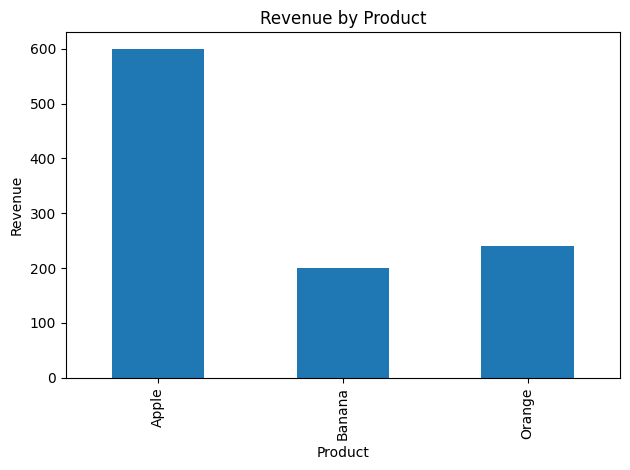

In [168]:
# Cell 9: Create bar chart for revenue by product

# Create a bar chart for revenue by product and saves in fig
fig, ax = plt.subplots()

df.plot(kind="bar", x="product", y="revenue", legend=False, ax=ax)

ax.set_title("Revenue by Product")
ax.set_xlabel("Product")
ax.set_ylabel("Revenue")

plt.tight_layout()

# Show chart
# plt.show()


**🧩 Cell 10 — Saving the chart**

In [169]:
# Cell 10: Save the bar chart as an image file

# Save chart image
fig.savefig("sales_chart.png")

# Show chart
plt.show()


**🧩 Cell 11 — Closing database connection**

In [170]:
# Cell 11: Close the database connection

# Close database connection
conn.close()
